Ceren Yılmaz Gülten Exercise 7 

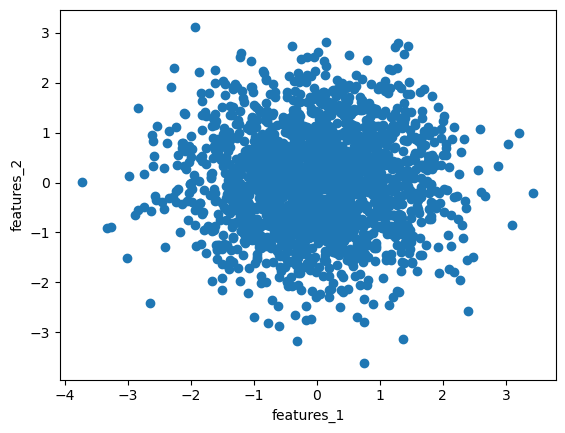

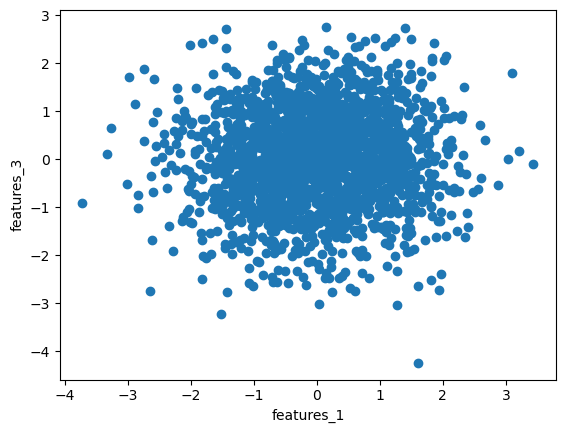

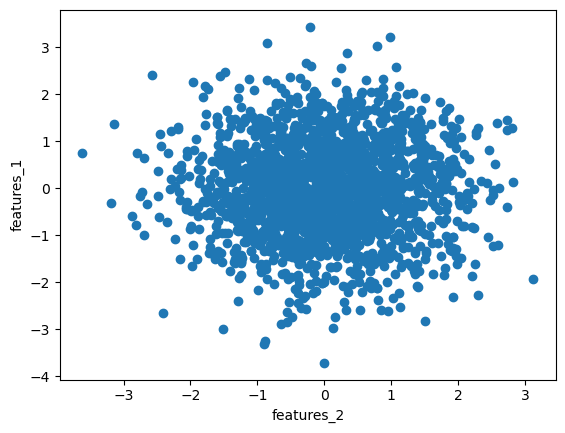

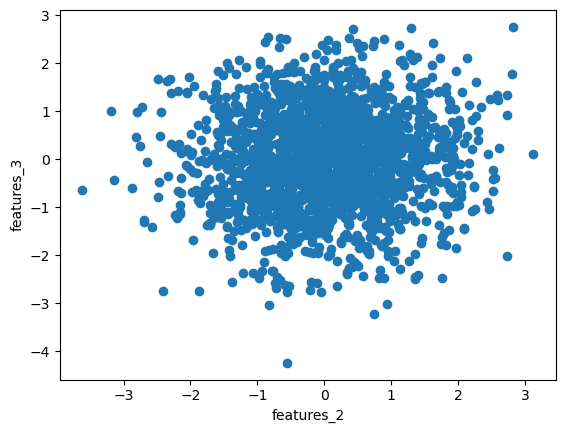

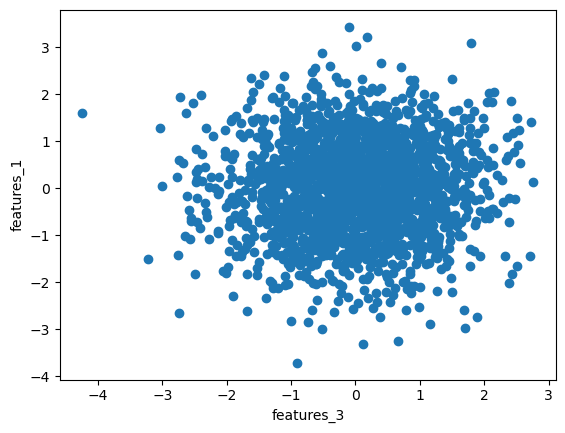

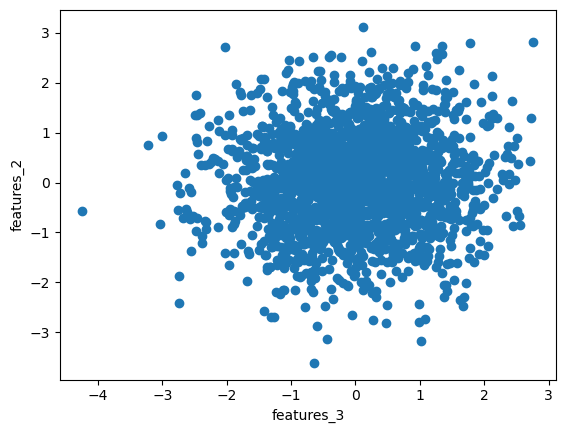

Correlation between features_1 - features_2 
 [[ 1.         -0.00521971]
 [-0.00521971  1.        ]]
Correlation between features_1 - features_3 
 [[1.         0.02369043]
 [0.02369043 1.        ]]
Correlation between features_2 - features_3 
 [[1.         0.04735994]
 [0.04735994 1.        ]]


In [76]:
# 1. Spotting correlations
import csv
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

#! wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv -P data/ 
data = pd.read_csv('data/regression_generated.csv')
df = pd.DataFrame(data)
#print(df)
header =['features_1', 'features_2', 'features_3']

for i in header:
    for j in header:
        if i == j:
            continue
        else: 
            plt.scatter(df[i], df[j])
            plt.xlabel(i)
            plt.ylabel(j)
            plt.show()

r_1 = np.corrcoef(df["features_1"], df["features_2"])
print("Correlation between features_1 - features_2 \n",r_1)
r_2 = np.corrcoef(df["features_1"], df["features_3"])
print("Correlation between features_1 - features_3 \n",r_2)
r_3 = np.corrcoef(df["features_2"], df["features_3"])
print("Correlation between features_2 - features_3 \n",r_3)
# correlation shows the strength of two features relationship. 
# if correlation's absolute value is 0 or smaller than 0.3 this mean relation between them 0 or too weak. 
# in correlation matrix up-left corner and down-right corner is always 1 because it is represent relation between theirself. 
# but up-right and down-left shows correlation coefficient between two features. 
# in our case between each combination of feature_1, feature_2 and feature_3, 
# the correlation coefficient's absolute value is always smaller than 0.3. This mean have weak relation 
# and we can say there are no correlation between them. 

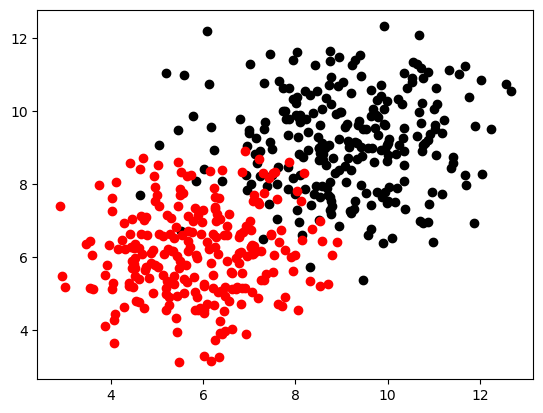

In [60]:
# 2. Color-coded scatter plot
import numpy as np 
import matplotlib.pyplot as plt
# np.random.normal --> normal gaussion distribution from random sample normal(mean(centre), standard_derivation(width),size)

sample_a = np.random.normal(9, 1.4, size=(2,250))
sample_b = np.random.normal(6, 1.2, size=(2,250))
# with size property we can create two category because 2,250 gives an [[#250],[#250]] type of result 
# so sample's first index will give the one category for sample and second index will give the other category of same sample 
plt.scatter(a[0],a[1], c="black")
plt.scatter(b[0],b[1], c='red')

       residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
2      -7.200000        3.4
3      -4.150000        8.4
4      -6.590000        1.7
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[11131 rows x 2 columns]
[[1.         0.04340351]
 [0.04340351 1.        ]]
24.899999999999977


C:\Users\crnyl\AppData\Local\Temp\ipykernel_13812\2330198250.py:39: RuntimeWarning: Mean of empty slice.
  y.append(np.array(df['residuals'][ (df['distances']< x[i+1]) & (df['distances']> x[i])]).mean() )
C:\Users\crnyl\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\crnyl\anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\crnyl\anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\crnyl\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\crnyl\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeW

Text(0, 0.5, 'Residuals')

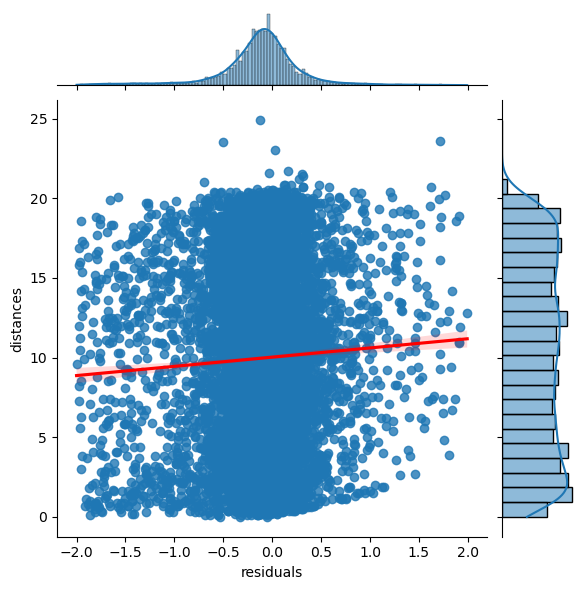

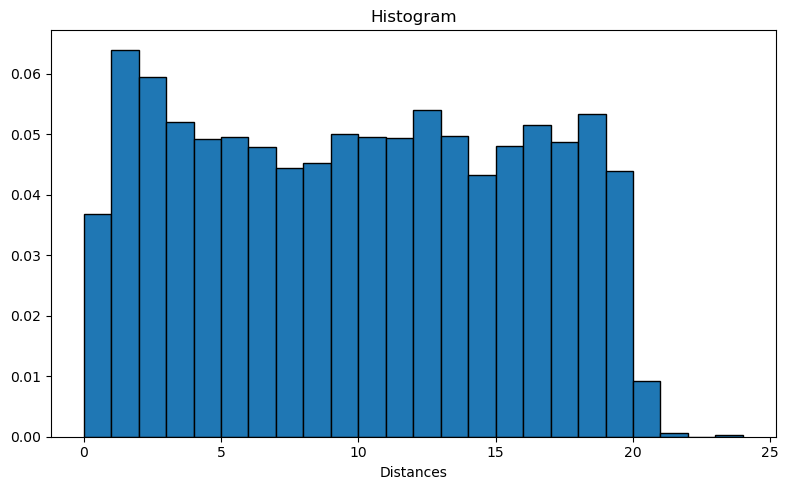

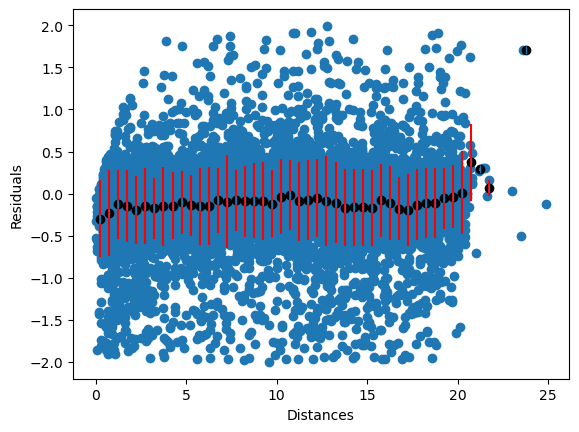

In [4]:
# 3. Profile plot
import pickle as pkl
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#! wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
data = pd.read_pickle("data/residuals_261.pkl").item()    
data = pd.DataFrame(data)
print(data)
# residuals absolute value smaller than 2 
df = data[np.abs(data['residuals'])<2]
# plot with seaborn jointplot 
p=sns.jointplot(data = df, x='residuals', y='distances', kind='reg', joint_kws={'line_kws':{'color':'red'}})

r = np.corrcoef(df["distances"], df["residuals"])
print(r)
# from correlation coefficient there are no correlation between two feature

# manually histogram 
fig = plt.figure(figsize=(8, 5)) # figure size 
plt.hist(df['distances'],edgecolor='black',bins=np.arange(min(df['distances']), max(df['distances']) ),
                      density=True) 
ax = fig.axes[0]
ax.set_title('Histogram')
ax.set_xlabel('Distances')
fig.tight_layout()


print(df['distances'].max())
x = np.arange(0,25,0.5)
bins = (x[1:]+x[:-1])*0.5 # to center the bins x[:-1] give the right edge of the bin 
y=[]
erry=[]
for i in range(len(x)-1): # to get right values for y
    # y's first column will be residuals value and the other one will be bin slices according to the distances value 
    # erry will be the same as y but std of it 
    y.append(np.array(df['residuals'][ (df['distances']< x[i+1]) & (df['distances']> x[i])]).mean() )
    erry.append(np.array(df['residuals'][ (df['distances']< x[i+1]) & (df['distances']> x[i]) ]).std() )
fig, ax = plt.subplots() # to show in the same plot 
ax.scatter(df['distances'],df['residuals']) 
ax.scatter(bins,y,marker = 'o',color='black')#points
ax.errorbar(bins,y,erry,fmt='|',ecolor='red') #errorbar
ax.set_xlabel('Distances')
ax.set_ylabel('Residuals')



[ 0.52772872 -1.37813116  1.0900746   0.49971759  3.40373928  3.23342086
  0.6895061  -1.05197303  1.49834556  1.90135024  2.45244586 -0.01839415
  0.64521428 -1.023655    0.67573619 -1.13154402 -0.79353603  1.35584541
  0.77432656  1.6889922   0.47823106 -0.10305866  0.94698493  2.24056137
  0.20772451  0.28478282  2.18983796  2.03785924  0.4078201   0.47029139
  0.36889231  1.29074784 -0.52691973 -0.30588875 -0.847828   -1.31343607
 -0.67899602  4.30058023  0.20271013  3.20060942 -0.1371689   2.23508022
  1.61272824  1.22537728  0.58361239  2.95092577  0.7592486   1.12899811
 -1.48418459  1.21035877  1.64965569  0.38655485  0.44109767  0.65786676
  2.2903294   0.37610835  0.84780516  0.99657823 -0.66257019  2.32937541
  1.17034851  1.47182788  0.77120397  0.72031527  1.18205456  2.3006405
  1.44032119  0.28700778 -1.06309189  1.30836775  2.68768004  2.94862858
  1.14428599  0.0936701   2.05987974  0.91995566  1.06783691  0.77960029
  3.43652054  2.83227113 -0.54488572  1.2004676  -0.

Text(0.5, 1.0, 'Superimpose version of First Histogram')

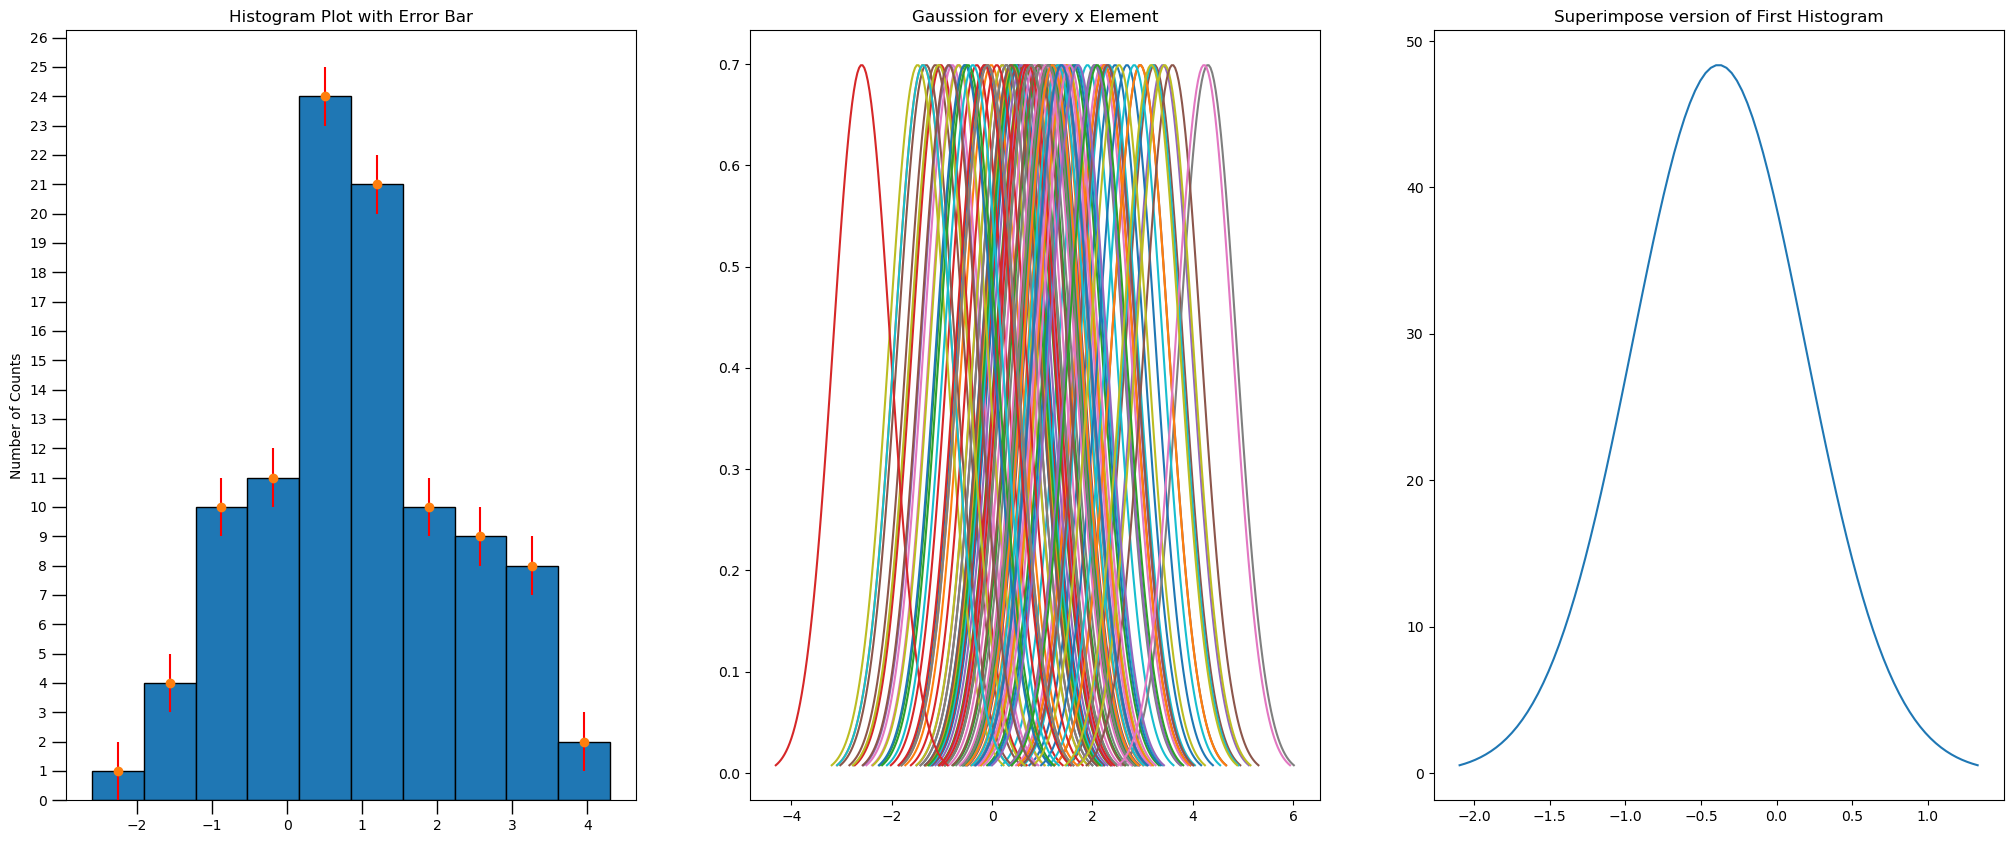

In [5]:
# 4. Kernel Density Estimate

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats
from scipy.integrate import trapz
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
N = 100 
# random.normal give gaussian distribution normal(mean,std,size)
# mean and std can be selected any value  but since in the question its normal gaussian dist. its equal to mean= 0 std=1
x = np.random.normal(0,1,N)
print(x)

# Histogram plot 
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(25,10))
bin_number = int(np.sqrt(x.shape[0])) # to determine bin number best solution is square root of your data 
n, bins,_ = axes[0].hist(x,bins=bin_number, edgecolor='black') # as a return n gives value of bins as a array and 
                                                             # the edge of the bins as a array
# setting major ticks label 
axes[0].yaxis.set_major_locator(MultipleLocator(1))
axes[0].tick_params(which='major', width=1.0)
axes[0].tick_params(which='major', length=10)
# setting proper y_label 
axes[0].set_ylabel('Number of Counts')
# display error points 
# we want to be errors on the centers of the array so we need to take center points
bins_cent = 0.5*(bins[1:] + bins[:-1]) # if we use -1 beginning on the right side of the array 
axes[0].errorbar(bins_cent,n, yerr=1 ,fmt='o', ecolor='red') # bins_cent location in the x axis, n location in the y axis
                                                        # yerr and xerr gives errorbar size 
axes[0].set_title('Histogram Plot with Error Bar')     
# Gaussian 
# formula 
default_std = 1.06*x.std()*(x.size**(-1/5))
gaus=[]
# with the formula we can plot the each x value as a gaussian
for i in range(N):
    mean = x[i] # get mean from x 
    x_gaus = np.linspace(mean - 3*default_std, mean + 3*default_std, N) # define new x from std and mean values 
                                                                    # the reason of 3 is normal gaussian distribution bandwidth
                                                                    # is -3 to 3
    gaus.append(stats.norm.pdf(x_gaus, mean, default_std)) #stats.norm.pdf calculate different types of normal distribution 
                                                    #stats.norm.pdf(data,loc(mean),moments(std),scale(default=1))
    axes[1].plot(x_gaus, gaus[i])
axes[1].set_title('Gaussion for every x Element')
# Sum of Gaussian 
sum_gaus = np.sum(gaus,axis=0)
norm = trapz(sum_gaus,x_gaus)
bin_width = bins[1]-bins[0] # since all the bins same width we can calculate from the just one 
area = bin_width * sum(n)  # we need bin_width and number of bin. Since they are stored in the array we need to calculate
normalized = sum_gaus*area/norm
axes[2].plot(x_gaus,normalized)
axes[2].set_title('Superimpose version of First Histogram')